In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.dates as mdates

In [3]:
logs = os.listdir('../../logs/sdumont')

In [4]:
countries = ["Brazil", "Germany", "India", "Japan", "United Kingdom", "United States", "South Korea"]

In [5]:
size = 30

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

 South Korea (50-day windows): 20/20, 20/20200

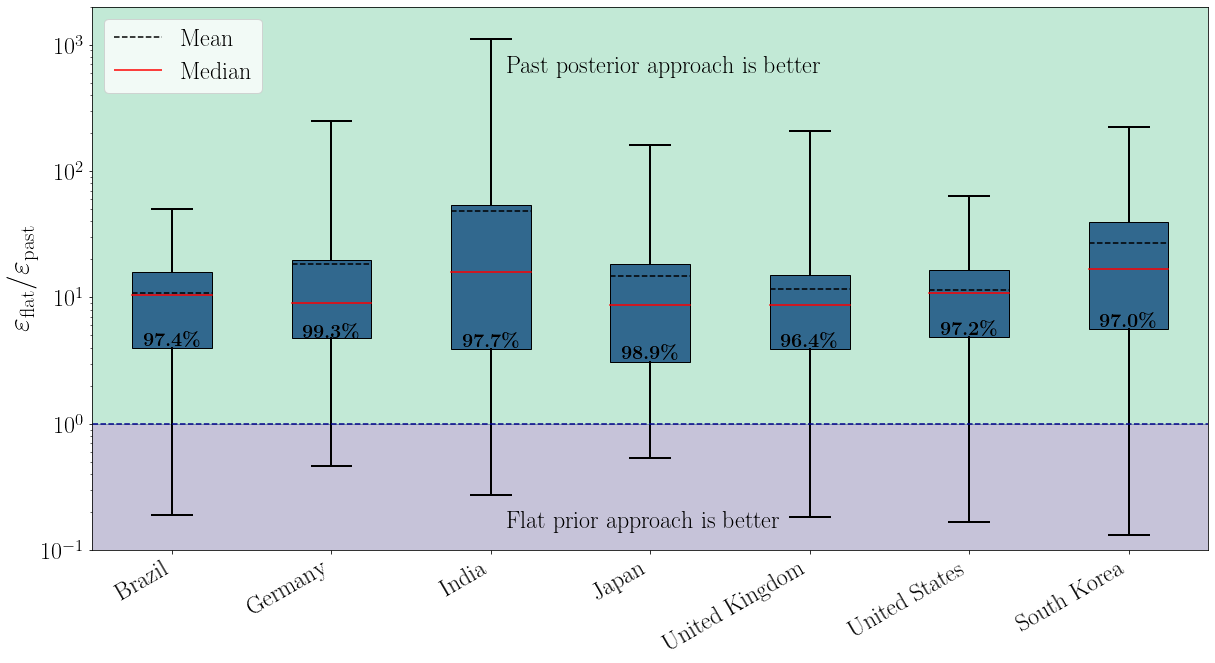

In [8]:
plt.figure(figsize=(20,10))
for i in range(len(countries)):
    
    errs_mean_past = []
    errs_mean_flat = []
    
    for size in [10, 20, 30, 40, 50]:
        past_true_count = 0
        past_false_count = 0
        for j in range(len(logs)):
            if "past_True" in logs[j] and countries[i] in logs[j] and f"{size}_day" in logs[j] and past_true_count < 20:
                days_folders = os.listdir("../../logs/sdumont/"+logs[j]+f"/Posterior1/{countries[i]}/SEIRD2")
                n_window = len(days_folders)

                for k in range(n_window):
                    log = open("../../logs/sdumont/"+logs[j]+f"/Posterior3/{countries[i]}/SEIRD2/"+str(days_folders[k])+"/SEIRD_log.out").read().split("\n")

                    for line in log:
                        if "Weighted RMSD:" in line:
                            rmsd = float(line.split(" ")[-1])

                    errs_mean_past.append(rmsd)

                past_true_count += 1

            elif "past_False" in logs[j] and countries[i] in logs[j] and f"{size}_day" in logs[j] and past_false_count < 20:
                days_folders = os.listdir("../../logs/sdumont/"+logs[j]+f"/Posterior1/{countries[i]}/SEIRD2")
                n_window = len(days_folders)

                for k in range(n_window):
                    log = open("../../logs/sdumont/"+logs[j]+f"/Posterior3/{countries[i]}/SEIRD2/"+str(days_folders[k])+"/SEIRD_log.out").read().split("\n")

                    for line in log:
                        if "Weighted RMSD:" in line:
                            rmsd = float(line.split(" ")[-1])

                    errs_mean_flat.append(rmsd)

                past_false_count += 1
                
            print(f"\r {countries[i]} ({size}-day windows): {past_true_count}/20, {past_false_count}/20", end="")
            
    errs_mean_past = np.array(errs_mean_past)
    errs_mean_flat = np.array(errs_mean_flat)
    
    plt.boxplot(errs_mean_flat/errs_mean_past, meanline = True, patch_artist = True,
            meanprops=dict(color='black', lw=1.5), medianprops=dict(color='red', lw=1.5), whiskerprops=dict(lw=2), capprops=dict(lw=2),
            showmeans = True, whis = (0, 100), positions = [i], widths = [0.5],
            boxprops=dict(facecolor=sns.color_palette('viridis', 5)[1]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'r', markersize=8))
    plt.text(i, np.percentile(errs_mean_flat/errs_mean_past, 26), r"\bf{%.1f}"%(len(np.where(errs_mean_flat/errs_mean_past>1)[0])/len(errs_mean_flat)*100)+r"\bf{\%}", 
             fontsize=20, ha="center", weight="bold")

plt.hlines(1, -1, 7, linestyles = 'dashed', color = 'darkblue')
plt.xticks([i for i in range(len(countries))], labels = countries, rotation=30, ha="right", fontsize = 24)
plt.yticks(fontsize=24)
plt.xlim(-0.5, 6.5)
plt.yscale('log')
plt.ylim(1e-1, 2e3)
plt.hlines(1e7,20,25, linestyles = 'dashed', color = 'black', lw = 1.5, label = 'Mean')
plt.hlines(1e7,20,25, color = 'red', lw = 1.5, label = 'Median')
plt.legend(loc = 'upper left', fontsize=24)
plt.ylabel(r'$\varepsilon_{\mathrm{flat}} / \varepsilon_{\mathrm{past}}$', fontsize = 30)
plt.fill_between([-1, 7], 1, 2e3, color = sns.color_palette('viridis', 5)[3],
                 alpha = 0.3)
plt.fill_between([-1, 7], 1e-2, 1, color = sns.color_palette('viridis', 5)[0],
                 alpha = 0.3)
plt.text(2.1, 6e2, 'Past posterior approach is better', fontsize=24)
plt.text(2.1, 1.5e-1, 'Flat prior approach is better', fontsize=24)
# plt.show()
plt.savefig("boxplot2", dpi=300, bbox_inches="tight")

In [ ]:
plt.figure()
for i in range(len(countries)):
    errs_mean_past = []
    errs_std_past = []
    errs_mean_flat = []
    errs_std_flat = []
    for k in range(len(day)):
        errs_past = []
        errs_flat = []
        for j in range(len(logs)):
            if "past_True" in logs[j] and countries[i] in logs[j]:
                err = np.loadtxt(f'./dados_clickcovid/{logs[j]}/Posterior3/{countries[i]}/SEIRD2/{day[k]}_days/fit_error.txt')
                errs_past.append(np.sum(np.abs(err)))
                #print(logs[j])
            elif "past_False" in logs[j] and countries[i] in logs[j]:
                err = np.loadtxt(f'./dados_clickcovid/{logs[j]}/Posterior3/{countries[i]}/SEIRD2/{day[k]}_days/fit_error.txt')
                errs_flat.append(np.sum(np.abs(err)))
        errs_past = np.array(errs_past)
        errs_flat = np.array(errs_flat)
        errs_mean_past.append(errs_past.flatten())
        errs_mean_flat.append(errs_flat.flatten())
        
    errs_mean_past = np.array(errs_mean_past)
    errs_mean_flat = np.array(errs_mean_flat)
    errs_mean_past = errs_mean_past.flatten()
    errs_mean_flat = errs_mean_flat.flatten()
    #print(errs_mean_flat)
    plt.boxplot(errs_mean_flat/errs_mean_past, meanline = True, patch_artist = True,
            meanprops=dict(color='black'), medianprops=dict(color='red'), showmeans = True,
            whis = (2.5, 97.5), positions = [i], widths = [0.5],
            boxprops=dict(facecolor=sns.color_palette('viridis', 5)[1]), flierprops=dict(marker='.',
                                                                  markerfacecolor = 'red'))

plt.hlines(1, -1, 5, linestyles = 'dashed', color = 'darkblue')
plt.xlim(-0.5, 2.5)
plt.xticks([0,1,2], labels = countries, fontsize = 12)
plt.yscale('log')
plt.ylim(3e-2, 3e2)
plt.hlines(1e7,20,25, linestyles = 'dashed', color = 'black', lw = 0.6,
          label = 'Mean')
plt.hlines(1e7,20,25, color = 'red', lw = 0.6,
          label = 'Median')
plt.legend(loc = 'upper left')
plt.ylabel(r'$\frac{\varepsilon_{\mathrm{flat}}}{\varepsilon_{\mathrm{past}}}$', fontsize = 18)
plt.show()

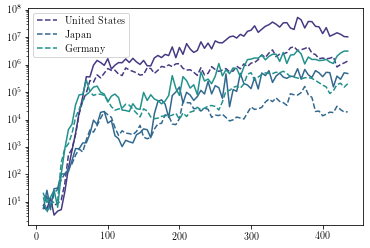

In [12]:
plt.figure()
for i in range(len(countries)):
    errs_mean_past = []
    errs_std_past = []
    errs_mean_flat = []
    errs_std_flat = []
    for k in range(len(day)):
        errs_past = []
        errs_flat = []
        for j in range(len(logs)):
            if "past_True" in logs[j] and countries[i] in logs[j]:
                err = np.loadtxt(f'./dados_clickcovid/{logs[j]}/Posterior3/{countries[i]}/SEIRD2/{day[k]}_days/fit_error.txt')
                errs_past.append(np.sum(np.abs(err)))
                #print(logs[j])
            elif "past_False" in logs[j] and countries[i] in logs[j]:
                err = np.loadtxt(f'./dados_clickcovid/{logs[j]}/Posterior3/{countries[i]}/SEIRD2/{day[k]}_days/fit_error.txt')
                errs_flat.append(np.sum(np.abs(err)))
        errs_past = np.array(errs_past)
        errs_flat = np.array(errs_flat)
        errs_mean_past.append(np.mean(errs_past))
        errs_std_past.append(np.std(errs_past))
        errs_mean_flat.append(np.mean(errs_flat))
        errs_std_flat.append(np.std(errs_flat))
        
    errs_mean_past = np.array(errs_mean_past)
    errs_std_past = np.array(errs_std_past)
    errs_mean_flat = np.array(errs_mean_flat)
    errs_std_flat = np.array(errs_std_flat)
    #print(errs_mean_flat)
    plt.plot(day, errs_mean_flat, color = sns.color_palette('viridis', 5)[i])
    plt.plot(day, errs_mean_past, color = sns.color_palette('viridis', 5)[i], linestyle = 'dashed', label = countries[i])
#     plt.fill_between(day, errs_mean_past-errs_std_past, errs_mean_past+errs_std_past,
#                     alpha = 0.2, color = f'C{i}')

plt.yscale('log')
plt.legend()
plt.show()